In [1]:
import importlib
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
import Hardmodel
importlib.reload(Hardmodel)
from Hardmodel import Hard_Model


import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

Found peaks:[ 6870  6944  7017  7091 19957 20031]
sigma: 11.68940013980931 n:0.7354298658977141
sigma: 11.881160091258051 n:0.7061480917912916
sigma: 11.960145976114935 n:0.7582691787414552
sigma: 11.72819962387777 n:0.7323344836408968
sigma: 12.282661528328596 n:0.623920226764167
sigma: 12.132681692488246 n:0.608207255518021
Lorentzian %:ss: 0.005948092674086468
tensor([1., 1., 1., 1., 1., 1.], grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([11.7682, 11.5785, 11.9107, 11.8059, 12.1311, 12.0222],
       requires_grad=True)
hypothesises:
{(0, 1, 3, 4), (0, 1, 2, 3, 4, 5), (2,), (0, 1, 4, 5), (3, 4), (0, 2, 3, 5), (5,), (0, 1, 3), (0, 1, 3, 4, 5), (1, 2, 3, 4), (0, 2), (0, 5), (1, 2, 5), (0, 3, 4, 5), (0, 1, 2, 4, 5), (2, 5), (1, 3), (1, 4, 5), (2, 4, 5), (0, 2, 4), (0, 1, 2, 4), (4,), (1,), (4, 5), (0, 2, 3, 4), (0, 1, 5), (2, 3, 4, 5), (0, 1, 2), (0, 3, 5), (1, 2, 3, 4, 5), (1, 2, 4), (1, 2, 4, 5), (0, 1), (2, 4), (1, 2), (0, 4), (1, 3, 4, 5), (0, 2, 4, 5), (1, 5), (1,

c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=3.18834e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=1.84511e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.48006e-09): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=2.56921e-09): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.63379e-09): result may not be accurate.
  w = solve(XtX[np.

Loss: 0.005867061647464394
FINAL FOUND VALUES
means:
[19994.   6980.5]
means in ppm
[1.31997, 4.1001]
sigmas:
[12.076668 11.765848]
J coupling:
[74. 74.]
coupling in ppm
[0.015810000000000102, 0.015810000000000102]
multiplicity
[2 4]
N
[1. 1.]
W
[18.50641  17.903164]


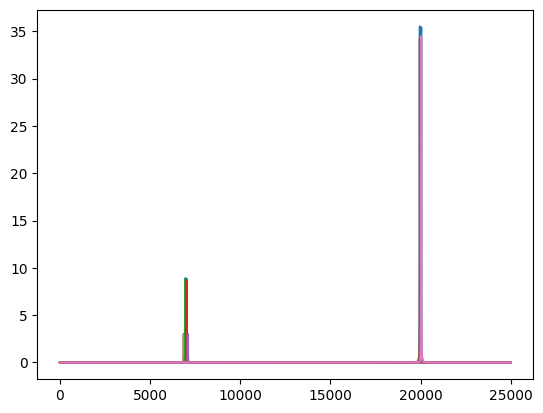

In [3]:
data = np.loadtxt("lactid_acid.txt")[30000:55000]
ppm = data[:,0]
X = data[:,1]
means, sigmas, n = single_fit(X, min_height=0.05, min_sigma=1, lr=10 , plot=True)
#diff_matrix = calc_difference_matrix(sigmas)
diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
hardmodel = Hard_Model(X, hypothesis, means, sigmas, n)

W, C, running_loss, path, lambdas, loss = hardmodel.fit(verbose=True, return_loss=True)
means, sigma, j_coup, mult, n, w = hardmodel.return_values()

print("FINAL FOUND VALUES")
print("means:")
print(means)
print("means in ppm")
print([ppm[int(m)] for m in means])
print("sigmas:")
print(sigma)
print("J coupling:")
print(j_coup)
print("coupling in ppm")
print([ppm[0]-ppm[int(m)] for m in j_coup])
print("multiplicity")
print(mult)
print("N")
print(n)
print("W")
print(w)

path = path[0]
lambdas = lambdas[0]

In [23]:
C_copy = C

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 33 34 35 36 37 38 39 40 46 42 43
 44 45 32 47 48 41 31 25 29 13 14 15 16 17 18 19 30 20 22 23 24 49 26 27
 28 21 50]
4000
4000


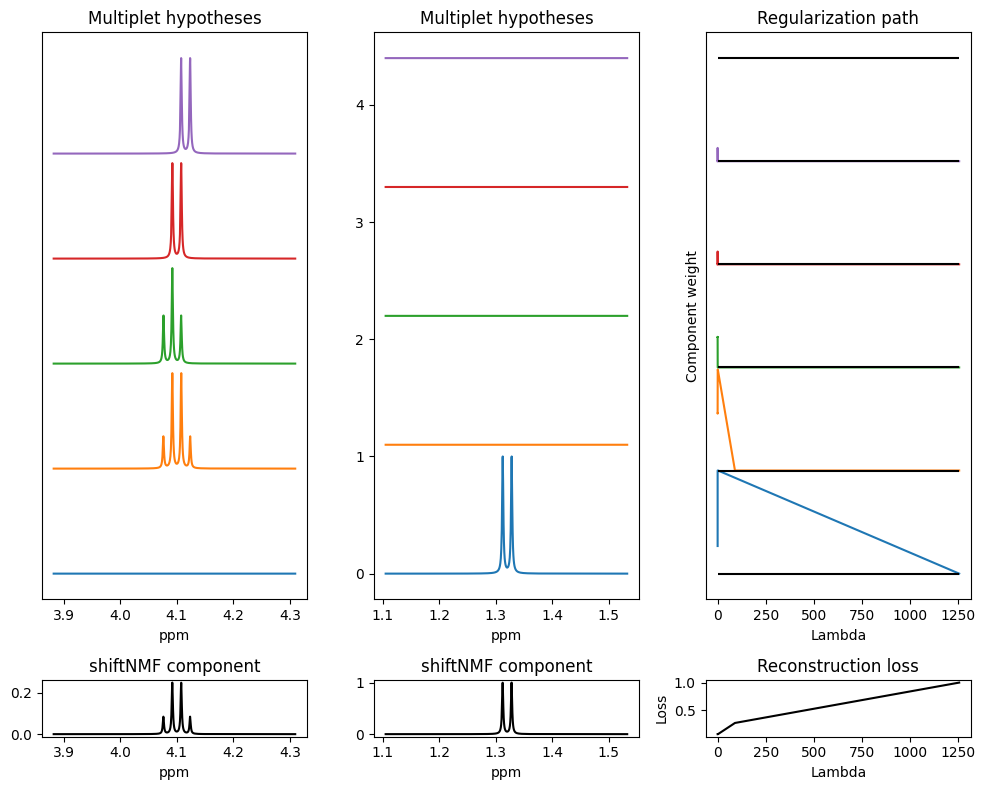

0.015386104149115835


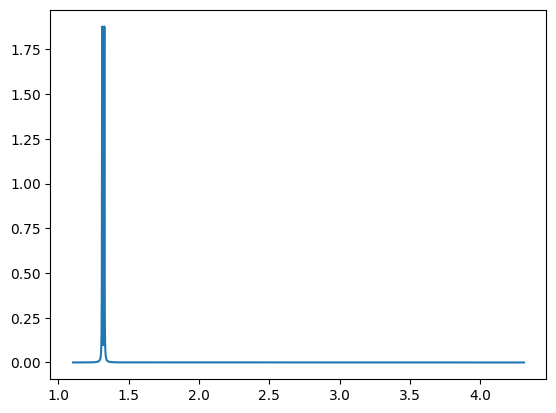

0.004886263770974585


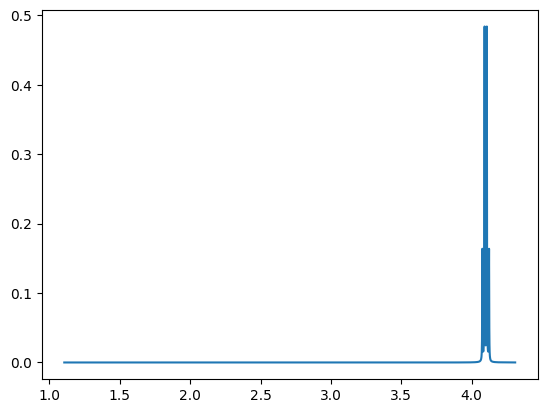

In [45]:
C = C_copy
ppm = data[:,0]
fig = plt.figure(figsize=(10, 8))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[10,1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('Multiplet hypotheses')

ax1.set_xlabel("ppm")

ax1b = plt.subplot(gs[1])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1b.set_title('Multiplet hypotheses')

ax1b.set_xlabel("ppm")
ax1b.get_yaxis().set_visible(False)


ax2 = plt.subplot(gs[2])
ax2.set_title('Regularization path')
ax2.set_xlabel("Lambda")
ax2.set_ylabel("Component weight")

ax1.tick_params(left = False, labelleft = False)
ax2.tick_params(left = False, labelleft = False)

ax3 = plt.subplot(gs[3])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax3.set_title('shiftNMF component')
ax3.plot(ppm[6000:8000],(X/max(X))[6000:8000], color="k")
ax3.set_xlabel("ppm")

ax3b = plt.subplot(gs[4])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax3b.set_title('shiftNMF component')
ax3b.plot(ppm[19000:21000],(X/max(X))[19000:21000], color="k")
ax3b.set_xlabel("ppm")

ax4 = plt.subplot(gs[5])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax4.set_title('Reconstruction loss')
ax4.plot(lambdas, loss, color="k")
ax4.set_xlabel("Lambda")
ax4.set_ylabel("Loss")


sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
print(sort_indices)
path = path[sort_indices]
C = C[sort_indices]

C_sub1 = C[:,6000:8000]
C_sub2 = C[:,19000:21000]
C = np.concatenate((C_sub1,C_sub2),axis=1)

ppm_sub1 = ppm[6000:8000]
ppm_sub2 = ppm[19000:21000]
ppm = np.concatenate((ppm_sub1,ppm_sub2))
print(len(ppm))
print(len(C[0]))
ymax = 1.1
yoffset = ymax
t = 0

nr_of_components = 5

for j in range(nr_of_components):
        ax1.plot(ppm_sub1,C_sub1[j]/max(C[j])+yoffset*t)
        ax1b.plot(ppm_sub2,C_sub2[j]/max(C[j])+yoffset*t)
        t += 1


ymax = path.max()
yoffset = ymax
t = 0
for j in range(nr_of_components):
        ax2.plot(lambdas,path[j]+yoffset*t)
        ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
        t +=1
ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
plt.tight_layout()
plt.show()
print(np.trapz(ppm, C[0]))
plt.plot(ppm,C[0])
plt.show()
print(np.trapz(ppm, C[1]))
plt.plot(ppm,C[1])
plt.show()    

